#  Analysis and Visualization of AQI in Delhi

- Here we analyze the Air quality of three highly polluted stations in Delhi(Anand Vihar,Bawana,DTU), before and after Lock Down.
https://economictimes.indiatimes.com/news/politics-and-nation/pollution-levels-spike-overnight-aqi-459/articleshow/71847305.cms#:~:text=All%20the%2037%20air%20quality,and%20Vivek%20Vihar%20(482).

<img src="https://resize.indiatvnews.com/en/resize/newbucket/715_-/2020/03/delhi-map-1585491690.jpg" alt="Alt text that describes the graphic" title="Title text" />

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
df=pd.read_excel(r'D:\AQI_Delhi.xlsx')
df.head()

,Date,City,State,Station Name,Current AQI value
0,2020-03-16,Amaravati,Andhra Pradesh,"Secretariat, Amaravati - APPCB",46.0
1,2020-03-16,Rajamahendravaram,Andhra Pradesh,"Anand Kala Kshetram, Rajamahendravaram - APPCB",60.0
2,2020-03-16,Tirupati,Andhra Pradesh,"Tirumala, Tirupati - APPCB",48.0
3,2020-03-16,Visakhapatnam,Andhra Pradesh,"GVM Corporation, Visakhapatnam - APPCB",95.0
4,2020-03-16,Guwahati,Assam,"Railway Colony, Guwahati - APCB",186.0


In [49]:
#Selecting rows of only state Delhi
df2=df[df['State']=='Delhi']
df2.head()

,Date,City,State,Station Name,Current AQI value
15,2020-03-16,Delhi,Delhi,"Alipur, Delhi - DPCC",97.0
16,2020-03-16,Delhi,Delhi,"Anand Vihar, Delhi - DPCC",NaN
17,2020-03-16,Delhi,Delhi,"Ashok Vihar, Delhi - DPCC",179.0
18,2020-03-16,Delhi,Delhi,"Aya Nagar, Delhi - IMD",109.0
19,2020-03-16,Delhi,Delhi,"Bawana, Delhi - DPCC",218.0


In [50]:
df3=df2.drop('City',axis='columns')
df3.head()

,Date,State,Station Name,Current AQI value
15,2020-03-16,Delhi,"Alipur, Delhi - DPCC",97.0
16,2020-03-16,Delhi,"Anand Vihar, Delhi - DPCC",NaN
17,2020-03-16,Delhi,"Ashok Vihar, Delhi - DPCC",179.0
18,2020-03-16,Delhi,"Aya Nagar, Delhi - IMD",109.0
19,2020-03-16,Delhi,"Bawana, Delhi - DPCC",218.0


In [51]:
#selecting only the three stations
df4=df3[(df3['Station Name']=='Bawana, Delhi - DPCC') | (df3['Station Name']=='DTU, Delhi - CPCB') | (df3['Station Name']=='Anand Vihar, Delhi - DPCC')]
df4.head()

,Date,State,Station Name,Current AQI value
16,2020-03-16,Delhi,"Anand Vihar, Delhi - DPCC",NaN
19,2020-03-16,Delhi,"Bawana, Delhi - DPCC",218.0
21,2020-03-16,Delhi,"DTU, Delhi - CPCB",174.0
235,2020-03-17,Delhi,"Anand Vihar, Delhi - DPCC",210.0
238,2020-03-17,Delhi,"Bawana, Delhi - DPCC",205.0


C:\Users\shaik akhil\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\shaik akhil\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\shaik akhil\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.

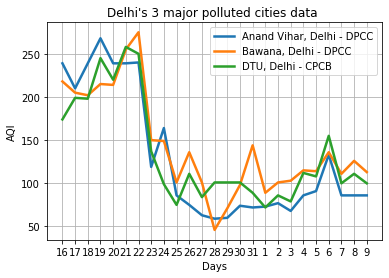

In [52]:
import math
%matplotlib inline
mean_mbl=[]
mean_mal=[]
g=df4.groupby('Station Name')

#Filling the NaN values with mean of values w.r.t to row number 
#If Nan value row in Before lockDown,fill with mean of values of Before lockDown, same as for Nan values in after lockDown
for i,j in g:    
    mbl=math.floor(j['Current AQI value'].iloc[0:7:].mean())
    j['Current AQI value'][0:7].fillna(mbl,inplace=True)
    mean_mbl.append(mbl)
    mal=math.floor(j['Current AQI value'].iloc[7::].mean())
    j['Current AQI value'].fillna(mal,inplace=True)
    mean_mal.append(mal)
    
    #plotting scatterplots
    l=list(j['Current AQI value'])
    Days=list(range(16,32))
    Days.extend(list(range(1,10)))
    xpos=np.arange((len(l)))
    plt.xticks(xpos,Days)
    plt.plot(xpos,l,linewidth=2.5,label=i)
    plt.xlabel('Days')
    plt.ylabel('AQI')
    plt.title('Delhi\'s 3 major polluted cities data ')
    plt.legend(loc='best')
    plt.grid()
  

In [53]:
print(mean_mbl)

[239, 226, 220]


In [54]:
print(mean_mal)

[86, 111, 101]


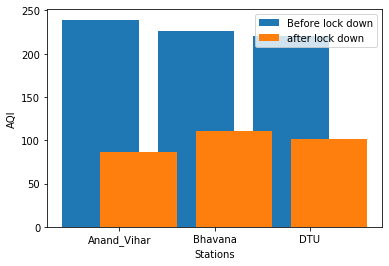

In [55]:
#Visualizing the AQI before and after LockDown
stations=['Anand_Vihar','Bhavana','DTU']
xpos=np.arange(len(stations))
plt.xticks(xpos,stations)
plt.bar(xpos-0.2,mean_mbl,label='Before lock down')
plt.bar(xpos+0.2,mean_mal,label='after lock down')
plt.xlabel('Stations')
plt.ylabel('AQI')
plt.legend()

In [56]:
#Pecentage Decrease in Air pollution of three stations
percentage_changes=[]
for i in range(len(stations)):
    q=mean_mal[i]/mean_mbl[i]*100
    percentage_changes.append(100-q)
percentage_changes

[64.01673640167364, 50.88495575221239, 54.090909090909086]

In [57]:
#Average Percentage change in AQI
Average_change=sum(percentage_changes)/3
Average_change

56.33086708159837